# 인공지능(딥러닝)개론 EE4178
## Pytorch 실습


---
Day1. Intro


> 0. Google Colab and Basic Python

> 1. Pytorch

> 2. XOR in Pytorch









## 0. Google Colab and Basic Python

### 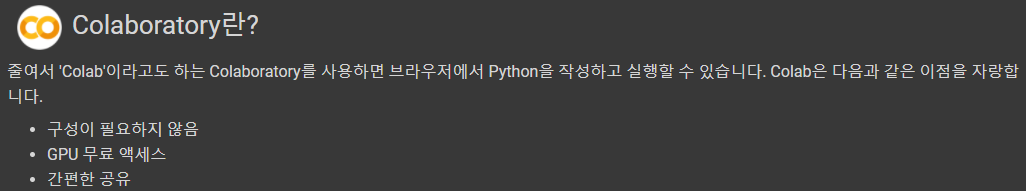



#### 0.1 자료형과 연산

숫자형

In [1]:
a = 10
b = 1.2
print(a, b)
print(a+b, a-b, a*b, a/b)

10 1.2
11.2 8.8 12.0 8.333333333333334


 문자형

In [2]:
quote = "Life is too short,"
print(quote, "You need Python")

Life is too short, You need Python


리스트/튜플

In [3]:
odd = [1, 3, 5, 7, 9]
alphabet = ["a", "b", "c"]
empty = []

In [4]:
odd[1]

3

In [5]:
print("odd[-1]: ", odd[-1])
print("odd[0:2]: ", odd[0:2])

odd[-1]:  9
odd[0:2]:  [1, 3]


In [6]:
alphabet.append("A")
alphabet.append(["B", "c"])
alphabet

['a', 'b', 'c', 'A', ['B', 'c']]

In [7]:
empty.append(1)
empty.append(2)
empty.append('3')
empty

[1, 2, '3']

In [8]:
print(type(empty[0]))
print(type(empty[-1]))

<class 'int'>
<class 'str'>


tuple: 

*   list와 비슷하지만 요소값 생성, 삭제, 수정이 불가
*   ()로 묶여 있음 (list의 경우 [])





딕셔너리

In [9]:
# Dictionary: {Key1:Value1, Key2:Value2, Key3:Value3, ....}

dic = {"김철수":80, "이영희":90, "박아무개":85}
print(dic["김철수"])
print(dic.keys())
print(dic.values())

80
dict_keys(['김철수', '이영희', '박아무개'])
dict_values([80, 90, 85])


In [10]:
dic['이름']=100
dic

{'김철수': 80, '박아무개': 85, '이름': 100, '이영희': 90}

#### 0.2 제어문

if문

In [11]:
print('emtpy:',empty)

if empty[1]%2 == 0:
  print("{} is an even number".format(empty[1]))
elif empty[1]%2 == 1:
  print("{} is an odd number".format(empty[1]))
else:
  print("Impossible")

emtpy: [1, 2, '3']
2 is an even number


for문

In [12]:
for i in range(5):
  print(i)

0
1
2
3
4


while 문

In [13]:
start = 0
while start<5:
  print(start)
  start = start + 2

print("final value: {}".format(start))

0
2
4
final value: 6


#### 0.3 함수/클래스

함수

In [14]:
def square_sum(a,b):
  squared_a = a**2
  squared_b = b**2
  
  return squared_a + squared_b

In [15]:
c = square_sum(3,4)
print("squared sum of {} and {} : {}".format(3, 4, c))

squared sum of 3 and 4 : 25


클래스

In [16]:
class Calculator():
  def __init__(self):
    self.description = "Example for initalizing a Class"
    self.result = 0

  def add(self, num1, num2):
    if type(num1) == int and type(num2) == int :
      result = num1 + num2
      return result
    else:
      raise Exception

  def mul(self, num1, num2):
    if type(num1) == int and type(num2) == int :
      result = num1 * num2
      return result
    else:
      raise Exception

In [17]:
cal = Calculator()
print(cal.description)
print(cal.add(3,4))
print(cal.mul(3,4))

Example for initalizing a Class
7
12


#### 0.4 패키지

import

In [18]:
import numpy as np

array = np.array([1,2,3])
print(array, type (array))

[1 2 3] <class 'numpy.ndarray'>


(0.0, 10.0)

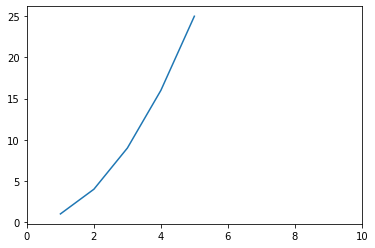

In [19]:
import matplotlib
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = []
for i in x:
  y.append(i**2)

plt.plot(x,y)
plt.xlim(0,10)

## 1. Pytorch

### 1.1 Tensors / Numpy

In [20]:
import torch
import numpy as np

## colab의 경우, 대부분의 package install 필요 없음 (바로 import 가능)
## 패키지 설치가 필요할 경우: 'pip install package_name'

**Python List / Numpy / Tensors**
* Python List: 행렬 연산을 위해 for 문 사용
* Numpy : 차원이 다른 행렬 간에도 연산이 가능
* Tensor : GPU 상에서 연산이 가능하고 autograd(자동 미분)연산 기능이 있는 자료형

#### Tensor 생성 및 초기화

In [21]:
# 초기화되지 않은 행렬 생성
x = torch.empty(5,3)
print(x)

tensor([[7.8757e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 2.8397e-36]])


In [22]:
# 0 ~ 1 사이의 랜덤 초기화 행렬 생성
x = torch.rand(5,3)
print(x)

tensor([[6.2673e-01, 8.8258e-01, 8.6359e-01],
        [9.5766e-01, 9.3514e-01, 1.4956e-01],
        [5.3877e-01, 1.3772e-01, 3.1156e-01],
        [8.4986e-01, 3.4695e-02, 5.3824e-01],
        [1.6451e-05, 7.8570e-02, 6.4179e-01]])


In [23]:
x.mean()

tensor(0.5031)

In [24]:
x.std()

tensor(0.3558)

In [25]:
# Standard Normal Distribution에서 랜덤 초기화 행렬 생성
x = torch.randn(5,3)
print(x)

tensor([[ 0.2258, -2.5049,  0.2897],
        [-1.9462, -0.2041, -1.1987],
        [ 0.4769, -0.5218, -0.6762],
        [ 0.2603,  1.0769,  2.5927],
        [ 1.3766, -0.5446,  2.1470]])


In [26]:
x.mean()

tensor(0.0566)

In [27]:
x.std()

tensor(1.3973)

In [28]:
# 특정 값을 tensor로 만들기
x = torch.tensor([1.2, 4.5])
x

tensor([1.2000, 4.5000])

#### Tensor size & Numpy 변환

In [29]:
# Size 확인
x = torch.randn(3,4)
print(x)
print("x size : ", x.size())

tensor([[ 0.8516,  0.3311, -0.2176, -0.7864],
        [ 1.1835,  1.1462, -0.9949, -1.5180],
        [-1.0092, -2.5749, -1.3198, -0.2773]])
x size :  torch.Size([3, 4])


In [30]:
# Resize - "reshape" : any tensor
x = torch.rand(3,4)
y = x.reshape(4,3)
z = x.reshape(-1, 2)
print(x, x.size(), "\n", y, y.size(), "\n", z, z.size())

tensor([[0.9223, 0.4113, 0.2203, 0.6717],
        [0.1777, 0.5780, 0.5633, 0.3667],
        [0.0763, 0.1073, 0.3504, 0.0547]]) torch.Size([3, 4]) 
 tensor([[0.9223, 0.4113, 0.2203],
        [0.6717, 0.1777, 0.5780],
        [0.5633, 0.3667, 0.0763],
        [0.1073, 0.3504, 0.0547]]) torch.Size([4, 3]) 
 tensor([[0.9223, 0.4113],
        [0.2203, 0.6717],
        [0.1777, 0.5780],
        [0.5633, 0.3667],
        [0.0763, 0.1073],
        [0.3504, 0.0547]]) torch.Size([6, 2])


In [31]:
# Resize - "view" : for contiguous tensors
x = torch.randn(3,4)
y = x.view(4,3)
z = x.view(-1, 2)
print(x, x.size(), "\n", y, y.size(), "\n", z, z.size())

tensor([[-1.6322, -0.3997,  0.2128,  1.4259],
        [-1.3549, -0.1981,  0.5755, -0.3500],
        [ 0.5209,  1.4203, -0.2046, -1.4972]]) torch.Size([3, 4]) 
 tensor([[-1.6322, -0.3997,  0.2128],
        [ 1.4259, -1.3549, -0.1981],
        [ 0.5755, -0.3500,  0.5209],
        [ 1.4203, -0.2046, -1.4972]]) torch.Size([4, 3]) 
 tensor([[-1.6322, -0.3997],
        [ 0.2128,  1.4259],
        [-1.3549, -0.1981],
        [ 0.5755, -0.3500],
        [ 0.5209,  1.4203],
        [-0.2046, -1.4972]]) torch.Size([6, 2])


#### Tensor, Numpy 변환

In [32]:
# Tensor to numpy
x = torch.ones(5)
y = x.numpy()
print(x, type(x))
print(y, type(y))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


In [33]:
# Numpy to tensor
x = np.ones(5)
y = torch.from_numpy(x)
print(x, type(x))
print(y, type(y))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64) <class 'torch.Tensor'>


In [34]:
# GPU 연산을 위한 CUDA tensor
x = torch.ones(5)
y = x.to(device="cuda:0") #런타임 연결 gpu로 설정
print(x)
print(y)

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], device='cuda:0')


#### Tensor Autograd
requires_grad를 true로 세팅하면 tensor에 대한 모든 연산 추적 가능

이를 통해 forward propagation 후, .backward() 호출 시 모든 gradient 자동으로 계산



In [35]:
x = torch.tensor(([1., 2.], [3., 4.]), requires_grad=True)
y = (x+2) **2 *3
print(y)

out = y.mean()
print(out)

out.backward()
print(x.grad)

tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
tensor(64.5000, grad_fn=<MeanBackward0>)
tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])


$$
\frac{\partial out}{\partial x} = \frac{\partial out}{\partial y} \frac{\partial y}{\partial x_i} = \frac{1}{4}6(x_i+2)
$$

### 1.2 Pytorch Project

#### 1.2.1 Load data

In [36]:
import torchvision # to download 'CIFAR10' datasest
import torchvision.transforms as transforms  # to manipulate input data

In [37]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets


In [38]:
# data check
image, label = train_data[0]
print(len(train_data), image.size(), label)

50000 torch.Size([3, 32, 32]) 6


In [39]:
import matplotlib
import matplotlib.pyplot as plt

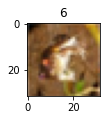

In [40]:
plt.subplot(141)
plt.imshow(image.permute(2,1,0))
plt.title(label)
plt.show()

#### 1.2.2. Define Dataloader

define dataloader (dataloader loads data from queue while iters loop)

In [41]:
import torch

In [42]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=64,
                                          shuffle=True)

In [43]:
# check how data loader works
print(len(data_loader))
for idx, (images, labels) in enumerate(data_loader):
  if idx ==3:
    break
  print(image.size(), labels)

782
torch.Size([3, 32, 32]) tensor([7, 6, 6, 0, 4, 2, 6, 8, 5, 4, 9, 9, 1, 1, 3, 1, 9, 0, 7, 2, 2, 0, 1, 2,
        9, 3, 5, 6, 2, 6, 9, 5, 2, 1, 3, 1, 6, 7, 8, 1, 1, 7, 5, 9, 3, 4, 9, 5,
        4, 3, 1, 1, 5, 4, 3, 9, 2, 2, 8, 2, 6, 5, 6, 7])
torch.Size([3, 32, 32]) tensor([3, 1, 7, 3, 0, 5, 0, 6, 4, 6, 3, 0, 4, 6, 4, 1, 1, 1, 2, 1, 9, 1, 7, 7,
        8, 9, 4, 0, 6, 4, 3, 4, 3, 5, 5, 0, 5, 8, 0, 7, 3, 7, 3, 1, 2, 3, 5, 5,
        1, 6, 4, 5, 8, 8, 1, 3, 5, 1, 5, 5, 7, 0, 9, 9])
torch.Size([3, 32, 32]) tensor([2, 4, 2, 7, 8, 8, 5, 3, 3, 0, 6, 2, 2, 2, 8, 2, 1, 9, 6, 0, 2, 0, 0, 6,
        8, 2, 8, 8, 8, 4, 8, 4, 9, 9, 3, 1, 5, 6, 9, 3, 3, 1, 8, 8, 9, 8, 4, 8,
        2, 0, 4, 4, 0, 5, 4, 5, 0, 6, 1, 1, 4, 6, 8, 7])


#### 1.2.3. Define Model

In [44]:
import torch.nn as nn
import torch.nn.functional as F

In [45]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc = nn.Linear(6*14*14, 10)


  def forward(self, x):
    out = self.layer1(x)
    out = out.reshape(out.size(0),-1)
    out = self.fc(out)

    return out

model = Net()

In [46]:
# check which layers constitue Network
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1176, out_features=10, bias=True)
)


In [47]:
# check how data passes through the Network
data_iter = iter(data_loader)
images, labels = data_iter.next()
outputs = model(images)
print(outputs.size(), '\n', outputs[0], '\n', outputs[0].tolist().index(max(outputs[0])))

torch.Size([64, 10]) 
 tensor([ 0.2197, -0.5517,  0.5352,  0.2360, -1.3655, -0.1266,  0.6011,  0.6740,
        -0.3055, -0.2245], grad_fn=<SelectBackward>) 
 7


#### 1.2.4. Set Loss & Optimizer

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### 1.2.5. Train / Test

In [50]:
epochs = 1
for epoch in range(epochs):
  for i, (images, labels) in enumerate(data_loader):
    # Forward Propagate
    outputs = model(images)

    # Get Loss, Compute Gradients, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 == 0 or (i+1)==len(data_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(data_loader), loss.item()))


Epoch [1/1], Step [1/782], Loss: 2.5005
Epoch [1/1], Step [51/782], Loss: 2.1597
Epoch [1/1], Step [101/782], Loss: 2.2193
Epoch [1/1], Step [151/782], Loss: 2.0503
Epoch [1/1], Step [201/782], Loss: 2.0002
Epoch [1/1], Step [251/782], Loss: 2.1444
Epoch [1/1], Step [301/782], Loss: 2.0217
Epoch [1/1], Step [351/782], Loss: 1.9076
Epoch [1/1], Step [401/782], Loss: 1.8414
Epoch [1/1], Step [451/782], Loss: 1.9274
Epoch [1/1], Step [501/782], Loss: 1.9516
Epoch [1/1], Step [551/782], Loss: 2.0390
Epoch [1/1], Step [601/782], Loss: 1.9507
Epoch [1/1], Step [651/782], Loss: 1.9251
Epoch [1/1], Step [701/782], Loss: 1.9117
Epoch [1/1], Step [751/782], Loss: 1.7867
Epoch [1/1], Step [782/782], Loss: 1.8981


#### 1.2.6. Save & Visualization

In [51]:
torch.save(model.state_dict(), 'my_model.pth')

In [52]:
# check the saved model
! ls

datasets  my_model.pth	sample_data


## 2. XOR in pytorch

In [53]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [54]:
x = torch.tensor([[0.,0.],[0.,1.], [1.,0.], [1.,1.]])
y = torch.tensor([0.,1.,1.,0.]).view(-1,1)

In [55]:
class XOR_net(nn.Module):
  def __init__(self):
    super(XOR_net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self, input, num_layer):
    if num_layer == 1:
      out = self.layer1(input)
    elif num_layer == 2:
      out = self.layer2(input)
    else:
      print("out of range")
      raise
    return out

In [56]:
net = XOR_net()

In [57]:
print(net)

XOR_net(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [58]:
learning_rate = 0.05
epochs = 10000

In [59]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)

In [60]:
error1, error2 = [], []

In [61]:
for epoch in range(epochs):
  for i, (input, ans) in enumerate(zip(x,y)):
    output1 = net(input,1)
    output2 = net(input,2)

    loss1 = criterion(output1, ans)
    loss2 = criterion(output2, ans)

    optimizer.zero_grad()
    loss1.backward()
    loss2.backward()
    optimizer.step()

    error1.append(loss1.detach().numpy())
    error2.append(loss2.detach().numpy())

  if epoch % 500 == 0 or (epoch+1)==epochs:
    print('Epoch [{}/{}] Loss1: {:.4f} Loss2: {:.4f}'.format(epoch+1, epochs, loss1, loss2))

Epoch [1/10000] Loss1: 0.7784 Loss2: 1.0256
Epoch [501/10000] Loss1: 0.7030 Loss2: 0.7549
Epoch [1001/10000] Loss1: 0.7058 Loss2: 0.8329
Epoch [1501/10000] Loss1: 0.7059 Loss2: 0.9768
Epoch [2001/10000] Loss1: 0.7059 Loss2: 0.7373
Epoch [2501/10000] Loss1: 0.7059 Loss2: 0.2140
Epoch [3001/10000] Loss1: 0.7059 Loss2: 0.0805
Epoch [3501/10000] Loss1: 0.7059 Loss2: 0.0446
Epoch [4001/10000] Loss1: 0.7059 Loss2: 0.0297
Epoch [4501/10000] Loss1: 0.7059 Loss2: 0.0219
Epoch [5001/10000] Loss1: 0.7059 Loss2: 0.0171
Epoch [5501/10000] Loss1: 0.7059 Loss2: 0.0139
Epoch [6001/10000] Loss1: 0.7059 Loss2: 0.0117
Epoch [6501/10000] Loss1: 0.7059 Loss2: 0.0101
Epoch [7001/10000] Loss1: 0.7059 Loss2: 0.0088
Epoch [7501/10000] Loss1: 0.7059 Loss2: 0.0078
Epoch [8001/10000] Loss1: 0.7059 Loss2: 0.0070
Epoch [8501/10000] Loss1: 0.7059 Loss2: 0.0063
Epoch [9001/10000] Loss1: 0.7059 Loss2: 0.0058
Epoch [9501/10000] Loss1: 0.7059 Loss2: 0.0053
Epoch [10000/10000] Loss1: 0.7059 Loss2: 0.0049


In [62]:
# Test after train
for input, target in zip (x, y):
  output1 = net(input,1)
  output2 = net(input,2)
  print("input: ",input, "layer1: ", output1.data, "\tlayer2: ", output2.data, "\tanswer:", target)

input:  tensor([0., 0.]) layer1:  tensor([0.5063]) 	layer2:  tensor([0.0055]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5000]) 	layer2:  tensor([0.9945]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4937]) 	layer2:  tensor([0.9945]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4873]) 	layer2:  tensor([0.0049]) 	answer: tensor([0.])


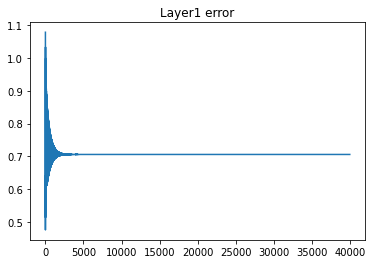

In [63]:
plt.plot(error1)
plt.title("Layer1 error")
plt.show()

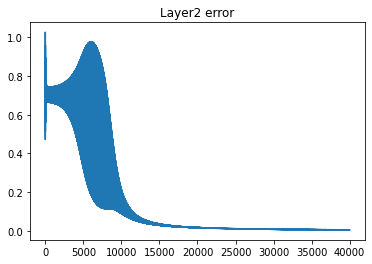

In [64]:
plt.plot(error2)
plt.title("Layer2 error")
plt.show()